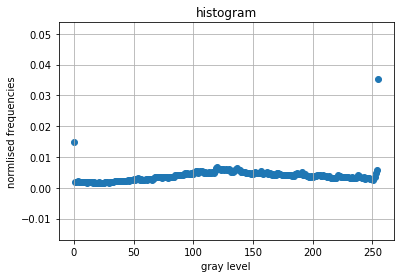

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('F:/dip/C.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
[m,n]=img.shape
hist=hist/(m*n)
x=np.arange(0,256)
figure=plt.plot(figsize=(20,20))
plt.scatter(x,hist)
plt.title('histogram')
plt.xlabel('gray level')
plt.ylabel('normlised frequencies')
plt.grid(True)



In [86]:
hist=list(hist)
k=1
list1=[]
for i in range (k,255):
    w1=0
    w2=0
    u1=0
    u2=0
    sigma1=0
    sigma2=0
    for i in range (256):
        if i<=k:
            w1=w1+hist[i]
        else:
            w2=w2+hist[i]
    for i in range (256):
        if i<=k:
            var2=i*hist[i]
            u1=u1+var2
        else:
            var2=i*hist[i] 
            u2=u2+var2
    u1=u1/w1
    u2=u2/w2
    uT=w1*u1+w2*u2
    for i in range (256):
        if i<=k:
            var3=((i-u1)**2)*hist[i]
            sigma1=sigma1+var3
        else:
            var4=((i-u2)**2)*hist[i]
            sigma2=sigma2+var4
            
    sigma1=sigma1/w1
    sigma2=sigma2/w2
    sigmaT=sigma1+sigma2
    sigmaB=w1*((u1-uT)**2)+w2*((u2-uT)**2)
    list1.append(sigmaB)
    k=k+1    
x1=list1.index(max(list1)) 
threshold=x1+1
print(threshold)

    
    
    

141


Text(0.5, 1.0, 'Segmented image by OTSU method')

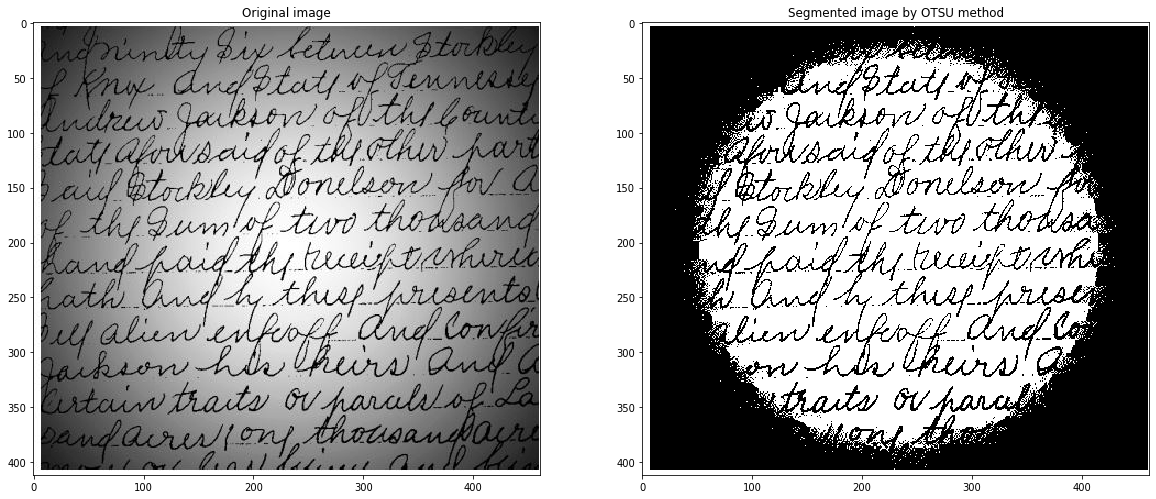

In [87]:
figure=plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.title('Original image')
img[img>=threshold]=255
img[img<threshold]=0
plt.subplot(1,2,2),plt.imshow(img,cmap='gray')
plt.title('Segmented image by OTSU method')

